<a href="https://colab.research.google.com/github/lukeml/Magnimind-Churn/blob/main/churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nb_path = '/content/notebooks'
sys.path.insert(0,nb_path)

In [ ]:
!chmod 755 -R '/content/drive/My Drive/Colab Notebooks/pyspark/./bin'

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
spark = SparkSession.builder.appName("Sparkify").getOrCreate()
sc = spark._sc

In [ ]:
data_file_path = '/content/drive/MyDrive/School/Data Science/Magnimind/Mentorship Program/Big Data/data/'

In [ ]:
churn_df = spark.read.csv(data_file_path+'churn-bigml-80.csv', header=True, inferSchema=True)

In [ ]:
churn_df.show(5)

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|State|Account length|Area code|International plan|Voice mail plan|Number vmail messages|Total day minutes|Total day calls|Total day charge|Total eve minutes|Total eve calls|Total eve charge|Total night minutes|Total night calls|Total night charge|Total intl minutes|Total intl calls|Total intl charge|Customer service calls|Churn|
+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|   

Area codes don't seem to be correct (e.g. Kansas and 415 area code, etc.)

In [ ]:
churn_df.printSchema()

root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



https://www.datasciencemadesimple.com/typecast-integer-to-string-and-string-to-integer-in-pyspark/

In [ ]:
churn_df = churn_df.withColumn("Area code", churn_df["Area code"].cast(StringType()))

In [ ]:
churn_df.printSchema()

root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: string (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



In [ ]:
churn_df.createOrReplaceTempView("churn_tbl")

In [ ]:
result = spark.sql("""
SELECT State,  
ROUND(AVG(if(churn = 'true', 1, 0)), 3) as churn_rate
FROM churn_tbl
GROUP BY 1
ORDER BY churn_rate DESC
""")

In [ ]:
result.show(60)

+-----+----------+
|State|churn_rate|
+-----+----------+
|   TX|     0.291|
|   NJ|      0.28|
|   AR|     0.234|
|   MD|     0.233|
|   MS|     0.229|
|   MI|     0.224|
|   ME|     0.224|
|   SC|     0.224|
|   PA|     0.222|
|   NV|     0.213|
|   NH|     0.209|
|   CA|     0.208|
|   WA|     0.208|
|   KS|     0.192|
|   MT|     0.189|
|   MN|     0.186|
|   CT|     0.186|
|   NY|     0.176|
|   GA|     0.163|
|   NC|     0.161|
|   DE|     0.157|
|   MA|     0.154|
|   OH|     0.152|
|   KY|      0.14|
|   OK|     0.135|
|   UT|     0.133|
|   FL|      0.13|
|   TN|     0.122|
|   SD|     0.122|
|   WY|     0.121|
|   CO|     0.119|
|   OR|     0.113|
|   IN|     0.111|
|   DC|     0.111|
|   AL|     0.106|
|   VT|     0.105|
|   MO|     0.098|
|   ND|     0.091|
|   NM|     0.091|
|   IL|     0.089|
|   NE|     0.089|
|   ID|     0.089|
|   LA|     0.086|
|   WV|      0.08|
|   IA|     0.079|
|   AK|      0.07|
|   AZ|     0.067|
|   WI|     0.066|
|   RI|     0.063|
|   VA|     

https://stackoverflow.com/questions/33053095/how-to-express-a-column-which-name-contains-spaces-in-spark-sql

In [ ]:
result_area_code = spark.sql("""
SELECT `Area code`,  
ROUND(AVG(if(LTRIM(churn) = 'true', 1, 0)), 2) as churn_rate
FROM churn_tbl
GROUP BY 1
ORDER BY churn_rate DESC
""")

In [ ]:
result_area_code.show()

+---------+----------+
|Area code|churn_rate|
+---------+----------+
|      510|      0.15|
|      415|      0.15|
|      408|      0.14|
+---------+----------+



Not sure what to make of these area codes. There are only 3, and they're from the San Francisco Bay Area.

In [ ]:
churn_df.select("Area code").distinct().show()

+---------+
|Area code|
+---------+
|      415|
|      408|
|      510|
+---------+



In [ ]:
churn_df.toPandas().groupby("State")['Churn'].mean().sort_values(ascending=False)

State
TX    0.290909
NJ    0.280000
AR    0.234043
MD    0.233333
MS    0.229167
SC    0.224490
ME    0.224490
MI    0.224138
PA    0.222222
NV    0.213115
NH    0.209302
WA    0.208333
CA    0.208333
KS    0.192308
MT    0.188679
CT    0.186441
MN    0.185714
NY    0.176471
GA    0.163265
NC    0.160714
DE    0.156863
MA    0.153846
OH    0.151515
KY    0.139535
OK    0.134615
UT    0.133333
FL    0.129630
SD    0.122449
TN    0.121951
WY    0.121212
CO    0.118644
OR    0.112903
IN    0.111111
DC    0.111111
AL    0.106061
VT    0.105263
MO    0.098039
ND    0.090909
NM    0.090909
ID    0.089286
NE    0.088889
IL    0.088889
LA    0.085714
WV    0.079545
IA    0.078947
AK    0.069767
AZ    0.066667
WI    0.065574
RI    0.062500
VA    0.059701
HI    0.045455
Name: Churn, dtype: float64

In [ ]:
churn_df = churn_df.withColumn('Churn_int', churn_df['Churn'].cast('integer'))

In [ ]:
churn_df.show(5)

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+---------+
|State|Account length|Area code|International plan|Voice mail plan|Number vmail messages|Total day minutes|Total day calls|Total day charge|Total eve minutes|Total eve calls|Total eve charge|Total night minutes|Total night calls|Total night charge|Total intl minutes|Total intl calls|Total intl charge|Customer service calls|Churn|Churn_int|
+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------------

In [ ]:
churn_pd = churn_df.toPandas()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

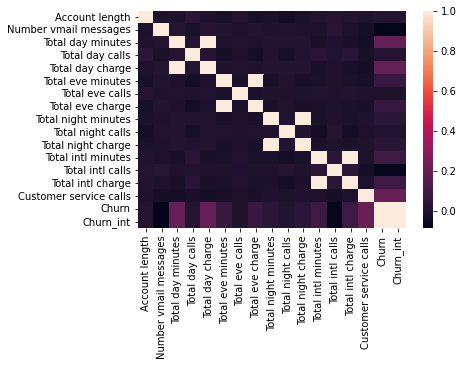

In [ ]:
sns.heatmap(churn_pd.corr())

Looks like we don't need both minutes and charges as they are exactly correlated as one might expect.

In [ ]:
churn_pd.select_dtypes(exclude = 'O').columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Churn_int'],
      dtype='object')

In [ ]:
# Also remove 'Churn' as that's our target
numeric_cols = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls']

In [ ]:
churn_pd_numeric = churn_pd[numeric_cols]

In [ ]:
churn_pd_numeric.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [ ]:
churn_pd.select_dtypes(include = 'O').columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan'], dtype='object')

I don't think area code makes sense to keep as it's not clear (to me) how it's assigned given that those area codes don't match the actual areas.

In [ ]:
categorical_cols = ['State', 'International plan', 'Voice mail plan']

In [ ]:
churn_df.select(col('Churn_int')).show()

+---------+
|Churn_int|
+---------+
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        1|
|        0|
+---------+
only showing top 20 rows



Role of StringIndexer and Pipelines in PySpark ML Feature

https://medium.com/@nutanbhogendrasharma/role-of-stringindexer-and-pipelines-in-pyspark-ml-feature-b79085bb8a6c

When to use StringIndexer vs StringIndexer+OneHotEncoder?

https://stackoverflow.com/questions/67993139/when-to-use-stringindexer-vs-stringindexeronehotencoder

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [ ]:
stages = []
for categorical_col in categorical_cols:
  string_idx = StringIndexer(inputCol=categorical_col, outputCol=categorical_col+ 'Index')
  encoder = OneHotEncoder(inputCols=[string_idx.getOutputCol()], outputCols= [categorical_col + "ClassVec"])
  stages +=[string_idx, encoder]

In [ ]:
stages

[StringIndexer_d8eb3e75d422,
 OneHotEncoder_54e7a6d462f4,
 StringIndexer_48947de02322,
 OneHotEncoder_13ae5cf75461,
 StringIndexer_325af6db2333,
 OneHotEncoder_2dc6581ee87a]

In [ ]:
# Below doesn't work because 'Churn' is boolean
# However, 'Churn' shows up in 'numeric' col
label_stringIdx = StringIndexer(inputCol='Churn', outputCol='label')
# stages += [label_stringIdx]

In [ ]:
df2 = label_stringIdx.fit(churn_df).transform(churn_df)
df2.show()

IllegalArgumentException: ignored

In [ ]:
assemblerInputs = [c + 'ClassVec' for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')
stages += [assembler]

In [ ]:
stages

[StringIndexer_d8eb3e75d422,
 OneHotEncoder_54e7a6d462f4,
 StringIndexer_48947de02322,
 OneHotEncoder_13ae5cf75461,
 StringIndexer_325af6db2333,
 OneHotEncoder_2dc6581ee87a,
 VectorAssembler_32008dc6ff8d]

In [ ]:
pipeline = Pipeline(stages=stages)
pipelineModel=pipeline.fit(churn_df)
dataset = pipelineModel.transform(churn_df)
selected_cols = ['features'] + churn_df.columns


In [ ]:
dataset.select(selected_cols)

DataFrame[features: vector, State: string, Account length: int, Area code: string, International plan: string, Voice mail plan: string, Number vmail messages: int, Total day minutes: double, Total day calls: int, Total day charge: double, Total eve minutes: double, Total eve calls: int, Total eve charge: double, Total night minutes: double, Total night calls: int, Total night charge: double, Total intl minutes: double, Total intl calls: int, Total intl charge: double, Customer service calls: int, Churn: boolean, Churn_int: int]

In [ ]:
dataset.select(selected_cols).show()

+--------------------+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+---------+
|            features|State|Account length|Area code|International plan|Voice mail plan|Number vmail messages|Total day minutes|Total day calls|Total day charge|Total eve minutes|Total eve calls|Total eve charge|Total night minutes|Total night calls|Total night charge|Total intl minutes|Total intl calls|Total intl charge|Customer service calls|Churn|Churn_int|
+--------------------+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+-----

In [ ]:
new_dataset = dataset.select(selected_cols)

In [ ]:
trainingData, testData = dataset.randomSplit([0.7, 0.3], seed=43)

In [ ]:
trainingData.show()

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+---------+----------+---------------+-----------------------+--------------------------+--------------------+-----------------------+--------------------+
|State|Account length|Area code|International plan|Voice mail plan|Number vmail messages|Total day minutes|Total day calls|Total day charge|Total eve minutes|Total eve calls|Total eve charge|Total night minutes|Total night calls|Total night charge|Total intl minutes|Total intl calls|Total intl charge|Customer service calls|Churn|Churn_int|StateIndex|  StateClassVec|International planIndex|International planClassVec|Voice mail planIndex|Voice mail planClassVec|            features|
+-----+--------------+------

In [ ]:
churn_int = churn_df.select(col('Churn').cast('int'))

In [ ]:
churn_int.show(3)

+-----+
|Churn|
+-----+
|    0|
|    0|
|    0|
+-----+
only showing top 3 rows



In [ ]:
churn_int.select(avg('Churn')).show()

+-----------------+
|       avg(Churn)|
+-----------------+
|0.145536384096024|
+-----------------+



In [ ]:
churn_int.select(avg('Churn')).collect()

[Row(avg(Churn)=0.145536384096024)]

In [ ]:
churn_int.select(avg('Churn')).collect()[0]

Row(avg(Churn)=0.145536384096024)

In [ ]:
churn_int.select(avg('Churn')).collect()[0][0]

0.145536384096024

In [ ]:
churn_df.select(avg('Churn_int')).collect()[0][0]

0.145536384096024

In [ ]:
training_data_positive_rate = churn_int.select(avg('Churn')).collect()[0][0]

In [ ]:
training_data_positive_rate

0.145536384096024

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr = LogisticRegression(labelCol='Churn_int', featuresCol='features', maxIter=10)
lr.setThreshold(training_data_positive_rate)
lrModel = lr.fit(trainingData)


In [ ]:
lrTrainingSummary = lrModel.summary

In [ ]:
lrTrainingSummary.areaUnderROC

0.858655604771157

In [ ]:
lrTrainingSummary.accuracy

0.7921108742004265

In [ ]:
# lrTrainingSummary.fMeasureByThreshold.groupBy().max('F-Measure').select(max('F-Measure'))

In [ ]:
lrTrainingSummary.fMeasureByThreshold

/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


DataFrame[threshold: double, F-Measure: double]

In [ ]:
fMeasure = lrTrainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
lrBestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']


/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Another way to define threshold for logistic regression model

In [ ]:
print("Best threshold based on model performance on training data is {}".format(lrBestThreshold))

Best threshold based on model performance on training data is 0.2514696168123214


In [ ]:
lr_predictions = lrModel.transform(testData)

In [ ]:
lr_predictions.select('Churn_int', 'prediction', 'probability').show()

+---------+----------+--------------------+
|Churn_int|prediction|         probability|
+---------+----------+--------------------+
|        0|       0.0|[0.96893453107695...|
|        0|       0.0|[0.99004272431352...|
|        0|       0.0|[0.94607736601517...|
|        0|       0.0|[0.91519180563481...|
|        0|       0.0|[0.91322699344844...|
|        0|       0.0|[0.85834087941087...|
|        0|       0.0|[0.96938131328713...|
|        0|       1.0|[0.83625813207296...|
|        0|       0.0|[0.91671262286715...|
|        0|       0.0|[0.95616112930349...|
|        0|       0.0|[0.98442587493108...|
|        0|       0.0|[0.98261803149751...|
|        0|       1.0|[0.61176608385925...|
|        0|       0.0|[0.99319155232654...|
|        0|       1.0|[0.57332957954357...|
|        0|       0.0|[0.97939315456381...|
|        1|       0.0|[0.89150783750402...|
|        0|       0.0|[0.89986598861988...|
|        0|       0.0|[0.95137198957028...|
|        0|       0.0|[0.9863213

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics  

In [ ]:
test_evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Churn_int')

In [ ]:
test_auc = test_evaluator.evaluate(lr_predictions, {test_evaluator.metricName:'areaUnderROC'})

In [ ]:
test_auc

0.7717916343291366

In [ ]:
lr_predictions.select('prediction', 'Churn_int').show()

+----------+---------+
|prediction|Churn_int|
+----------+---------+
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
|       1.0|        0|
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
|       1.0|        0|
|       0.0|        0|
|       1.0|        0|
|       0.0|        0|
|       0.0|        1|
|       0.0|        0|
|       0.0|        0|
|       0.0|        0|
+----------+---------+
only showing top 20 rows



In [ ]:
type(lr_predictions.select('prediction', col('Churn_int').cast("double").alias('Churn_int')))

pyspark.sql.dataframe.DataFrame

In [ ]:
type(lr_predictions.select('prediction', col('Churn_int').cast("double").alias('Churn_int')).rdd)

pyspark.rdd.RDD

Had an error with float required (int as label/Churn_int)

https://stackoverflow.com/questions/49729510/pyspark-ml-type-error-when-computing-precision-and-recall


In [ ]:
def print_performance_metrics(predictions):
  evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Churn_int')
  auc = evaluator.evaluate(predictions, {evaluator.metricName:'areaUnderROC'})
  aupr = evaluator.evaluate(predictions, {evaluator.metricName:'areaUnderPR'})

  print(f'AUC is {auc}')
  print(f'AUPR is {aupr}')

  # https://stackoverflow.com/questions/49729510/pyspark-ml-type-error-when-computing-precision-and-recall
  # predictions = (predictions.withColumn('Churn_int', predictions['Churn_int'].cast("double")))
  prediction_labels = predictions.select('prediction', col('Churn_int').cast("double").alias('Churn_int')).rdd
  
  print("test 3")
  # BinaryClassificationMetrics seems to generate the FutureWarning, but a google search didn't help
  binary_metrics = BinaryClassificationMetrics(prediction_labels)
  print("test 4")
  multi_metrics = MulticlassMetrics(prediction_labels)
  
  print(f'Area under PR: {binary_metrics.areaUnderPR}')
  print(f'Area under ROC: {binary_metrics.areaUnderROC}')
  print(f'Accuracy: {multi_metrics.accuracy}')
  print("\n")
  print(multi_metrics.confusionMatrix())

  print("\n")
  print(f'F1: {multi_metrics.weightedFMeasure(1.0)}')
  print(f'Precision: {multi_metrics.weightedPrecision}')
  print(f'Recall: {multi_metrics.weightedRecall}')
  print(f'False Positive Rate: {multi_metrics.weightedFalsePositiveRate}')
  print(f'True Positive Rate: {multi_metrics.weightedTruePositiveRate}')

In [ ]:
print_performance_metrics(lr_predictions)

AUC is 0.7717916343291366
AUPR is 0.43524606186786075
test 3


/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


test 4
Area under PR: 0.33720413962949475
Area under ROC: 0.7205284435126087
Accuracy: 0.7582278481012659


DenseMatrix([[512., 147.],
             [ 44.,  87.]])


F1: 0.7820929497402919
Precision: 0.829815251985364
Recall: 0.7582278481012659
False Positive Rate: 0.3171709610760483
True Positive Rate: 0.7582278481012659


Gradient Boosting Classifier

In [ ]:
from pyspark.ml.classification import GBTClassifier

In [ ]:
gb = GBTClassifier(labelCol='Churn_int', featuresCol='features', maxIter=10)
gbModel = gb.fit(trainingData)

In [ ]:
gbPredictions = gbModel.transform(testData)

In [ ]:
gbPredictions.show()

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+---------+----------+---------------+-----------------------+--------------------------+--------------------+-----------------------+--------------------+--------------------+--------------------+----------+
|State|Account length|Area code|International plan|Voice mail plan|Number vmail messages|Total day minutes|Total day calls|Total day charge|Total eve minutes|Total eve calls|Total eve charge|Total night minutes|Total night calls|Total night charge|Total intl minutes|Total intl calls|Total intl charge|Customer service calls|Churn|Churn_int|StateIndex|  StateClassVec|International planIndex|International planClassVec|Voice mail planIndex|Voice mail planClassV

In [ ]:
print_performance_metrics(gbPredictions)

AUC is 0.917646445574488
AUPR is 0.8659905203544027
test 3


/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


test 4
Area under PR: 0.7994936979779526
Area under ROC: 0.8580662349847675
Accuracy: 0.9417721518987342


DenseMatrix([[648.,  11.],
             [ 35.,  96.]])


F1: 0.939356960313224
Precision: 0.9402057955807317
Recall: 0.9417721518987342
False Positive Rate: 0.22563968192919903
True Positive Rate: 0.9417721518987342


Seems like a pretty good improvement over logistic regression

In [ ]:
# print(gb.explainParams())

Cross Validation

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
gbParamBuilder = (ParamGridBuilder()
                  .addGrid(gb.maxDepth, [5,10])
                  .addGrid(gb.maxIter, [2,5])
                  .build())


In [ ]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Churn_int')

In [ ]:
gbCV = CrossValidator(estimator=gb, estimatorParamMaps=gbParamBuilder, numFolds=5, evaluator = evaluator)

In [ ]:
gbCVModel = gbCV.fit(trainingData)


In [ ]:
print(gbCVModel.bestModel._java_obj.getMaxDepth())
print(gbCVModel.bestModel._java_obj.getMaxIter())

5
5


In [ ]:
gbParamBuilder = (ParamGridBuilder()
                  .addGrid(gb.maxDepth, [3,5])
                  .addGrid(gb.maxIter, [5,8])
                  .build())


In [ ]:
gbCVModel = gbCV.fit(trainingData)

In [ ]:
print(gbCVModel.bestModel._java_obj.getMaxDepth())
print(gbCVModel.bestModel._java_obj.getMaxIter())

5
5


In [ ]:
gb2 = GBTClassifier(labelCol='Churn_int', featuresCol='features', maxIter=5, maxDepth=5)
gb2Model = gb2.fit(trainingData)

In [ ]:
gb2Predictions = gb2Model.transform(testData)

In [ ]:
print_performance_metrics(gb2Predictions)

AUC is 0.9132562638279139
AUPR is 0.8575627886373561
test 3


/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


test 4
Area under PR: 0.8214140063196318
Area under ROC: 0.86721727345388
Accuracy: 0.9468354430379747


DenseMatrix([[650.,   9.],
             [ 33.,  98.]])


F1: 0.9446302681120743
Precision: 0.9457479727280238
Recall: 0.9468354430379747
False Positive Rate: 0.21240089613021482
True Positive Rate: 0.9468354430379747


Lower AUC / AUPR

Very slight improvement based on the Confusion Matrix / F1 score

Feature Importance

In [ ]:
from itertools import chain

In [ ]:
attrs = sorted((attr['idx'], attr['name']) for attr in (chain(*gb2Predictions
                                                              .schema[gbCVModel.bestModel.summary.featuresCol]
                                                              .metadata['ml_attr']['attrs'].values())))

AttributeError: ignored

In [ ]:
attrs = sorted((attr['idx'], attr['name']) for attr in (chain(*gb2Predictions
                                                              .schema['features']
                                                              .metadata['ml_attr']['attrs'].values())))

In [ ]:
type(attrs)

list

In [ ]:
attrs[0:10]

[(0, 'StateClassVec_WV'),
 (1, 'StateClassVec_MN'),
 (2, 'StateClassVec_NY'),
 (3, 'StateClassVec_VA'),
 (4, 'StateClassVec_AL'),
 (5, 'StateClassVec_OH'),
 (6, 'StateClassVec_WY'),
 (7, 'StateClassVec_OR'),
 (8, 'StateClassVec_NV'),
 (9, 'StateClassVec_WI')]

Another example

https://swan-gallery.web.cern.ch/notebooks/apache_spark1/ML_Spark_MLlib.html

In [ ]:
gb_imp = pd.DataFrame([(name, gb2Model.featureImportances[idx]) for idx, name in attrs], columns=['feature_names', 'feature_importance'])

In [ ]:
print(gb_imp.sort_values(by=['feature_importance'], ascending=False))

                    feature_names  feature_importance
54              Total day minutes            0.259022
56              Total eve minutes            0.181863
62         Customer service calls            0.091071
50  International planClassVec_No            0.074373
58            Total night minutes            0.061460
..                            ...                 ...
26               StateClassVec_MO            0.000000
27               StateClassVec_NJ            0.000000
28               StateClassVec_GA            0.000000
33               StateClassVec_RI            0.000000
31               StateClassVec_SD            0.000000

[63 rows x 2 columns]


Maybe try random forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(labelCol='Churn_int', featuresCol='features', numTrees=50)

In [ ]:
rfModel = rf.fit(trainingData)

In [ ]:
rfPredictions = rfModel.transform(testData)

In [ ]:
print_performance_metrics(rfPredictions)

AUC is 0.9039488468533153
AUPR is 0.7760317270828933
test 3


/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


test 4
Area under PR: 0.16582278481012658
Area under ROC: 0.5
Accuracy: 0.8341772151898734


DenseMatrix([[659.,   0.],
             [131.,   0.]])


F1: 0.7587616077434459
Precision: 0.6958516263419323
Recall: 0.8341772151898734
False Positive Rate: 0.8341772151898734
True Positive Rate: 0.8341772151898734


Confusion matrix doesn't look good. All the values are on the left side, i.e. high false positive rate.

In [ ]:
rfParamBuilder = (ParamGridBuilder()
                  .addGrid(rf.numTrees, [50,60])
                  .addGrid(rf.maxDepth, [2,4])
                  .build())


In [ ]:
rfCV = CrossValidator(estimator=rf, estimatorParamMaps=rfParamBuilder, numFolds=5, evaluator = evaluator)

In [ ]:
rfCVModel = rfCV.fit(trainingData)


In [ ]:
print(rfCVModel.bestModel._java_obj.getNumTrees())
print(rfCVModel.bestModel._java_obj.getMaxDepth())

50
4


In [ ]:
rfParamBuilder = (ParamGridBuilder()
                  .addGrid(rf.numTrees, [45, 50])
                  .addGrid(rf.maxDepth, [4,6])
                  .build())


In [ ]:
rfCV = CrossValidator(estimator=rf, estimatorParamMaps=rfParamBuilder, numFolds=5, evaluator = evaluator)
rfCVModel = rfCV.fit(trainingData)

In [ ]:
print(rfCVModel.bestModel._java_obj.getNumTrees())
print(rfCVModel.bestModel._java_obj.getMaxDepth())

50
6


In [ ]:
rfParamBuilder = (ParamGridBuilder()
                  .addGrid(rf.numTrees, [50, 55])
                  .addGrid(rf.maxDepth, [8, 10])
                  .build())


In [ ]:
rfCV = CrossValidator(estimator=rf, estimatorParamMaps=rfParamBuilder, numFolds=5, evaluator = evaluator)
rfCVModel = rfCV.fit(trainingData)

In [ ]:
print(rfCVModel.bestModel._java_obj.getNumTrees())
print(rfCVModel.bestModel._java_obj.getMaxDepth())

50
10


In [ ]:
rf2 = RandomForestClassifier(labelCol='Churn_int', featuresCol='features', numTrees=50, maxDepth=8)

In [ ]:
rf2Model = rf2.fit(trainingData)

In [ ]:
rf2Predictions = rf2Model.transform(testData)

In [ ]:
print_performance_metrics(rf2Predictions)

AUC is 0.9136558977863709
AUPR is 0.8365579852063898
test 3


/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


test 4
Area under PR: 0.6688762199246304
Area under ROC: 0.6030534351145038
Accuracy: 0.8683544303797468


DenseMatrix([[659.,   0.],
             [104.,  27.]])


F1: 0.8298420837116559
Precision: 0.8862982563830316
Recall: 0.8683544303797468
False Positive Rate: 0.6622475601507392
True Positive Rate: 0.8683544303797468


In [ ]:
rf3 = RandomForestClassifier(labelCol='Churn_int', featuresCol='features', numTrees=50, maxDepth=10)

In [ ]:
rf3Model = rf3.fit(trainingData)

In [ ]:
rf3Predictions = rf3Model.transform(testData)

In [ ]:
print_performance_metrics(rf3Predictions)

AUC is 0.9094973878997795
AUPR is 0.8372509293120441
test 3


/content/drive/My Drive/Colab Notebooks/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


test 4
Area under PR: 0.6976007549295544
Area under ROC: 0.6702382745079869
Accuracy: 0.8886075949367088


DenseMatrix([[657.,   2.],
             [ 86.,  45.]])


F1: 0.8656609987438956
Precision: 0.8963902247351074
Recall: 0.8886075949367088
False Positive Rate: 0.548131045920735
True Positive Rate: 0.8886075949367088


Still not great based on confusion matrix, but better than initial attempts, i.e. false positive rate has decreased a bit.

Looks like our Gradient Boosting models outperformed Random Forest and Logistic Regression. 

Five most important features for the Gradient Boosting model:

```                    
              Total day minutes:            0.259022
              Total eve minutes:            0.181863
         Customer service calls:            0.091071
  International planClassVec_No:            0.074373
            Total night minutes:            0.061460
```